## Task 1 :
### Question 1.1 : Load the Dataset

In [1]:
# Import necessary libraries
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore warnings from seaborn
warnings.filterwarnings("ignore")
sns.set(style="white", color_codes=True)

# Load the Iris dataset from scikit-learn
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Create a Pandas DataFrame with feature names
iris_df = pd.DataFrame(X, columns=iris.feature_names)

# Add the target variable (species) to the DataFrame
iris_df['species'] = y

# Display the first 5 rows of the dataset
print(iris_df.head())

# Shape of the dataset
print("Shape of the dataset:", X.shape)

# To enable inline plotting in Jupyter
%matplotlib inline

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
Shape of the dataset: (150, 4)


## Task 2: Data Cleaning
## Question 2.1 : Exploratory Data Analysis (EDA)

Explanation:
• Print the summary statistics of the dataset (mean, median, mode, standard deviation, etc.).
• Check for any missing values in the dataset and handle them appropriately.
• Plot the distribution of each feature using histograms.
• Visualize the pairwise relationships between features using a pair plot (or scatter plot matrix).

In [2]:
# Summary statistics of the dataset
print(iris_df.describe())  # Mean, std, min, max, percentiles

# Calculate median and mode
print("Median:\n", iris_df.median())
print("Mode:\n", iris_df.mode())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  
Median:
 sepal length (cm)    5.80
sepal width (cm)     3.00
petal lengt

In [3]:
# Check for missing values
print(iris_df.isnull().sum())  # Should return 0 for all columns in this dataset


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


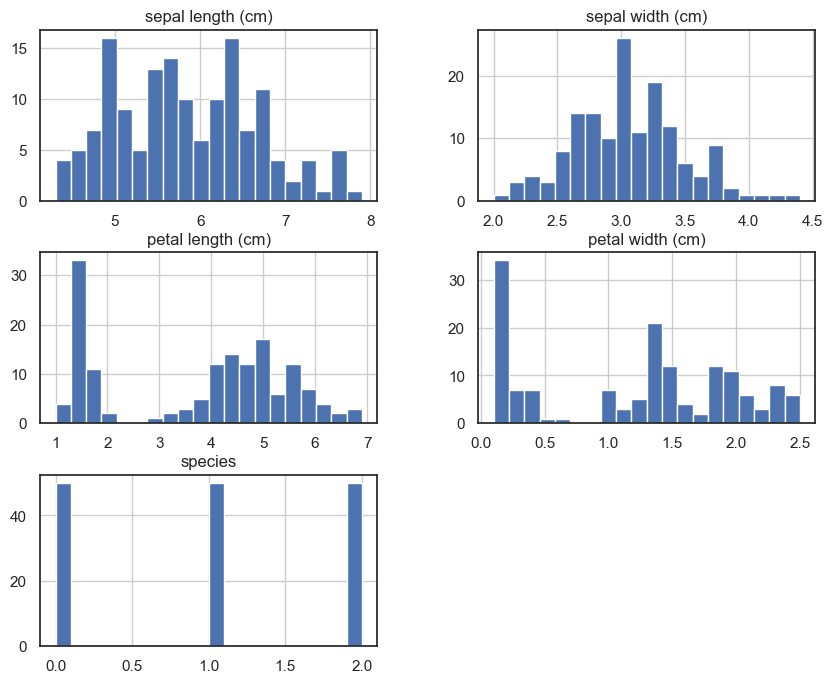

In [4]:
# Plot histograms for each feature
iris_df.hist(bins=20, figsize=(10, 8))
plt.show()


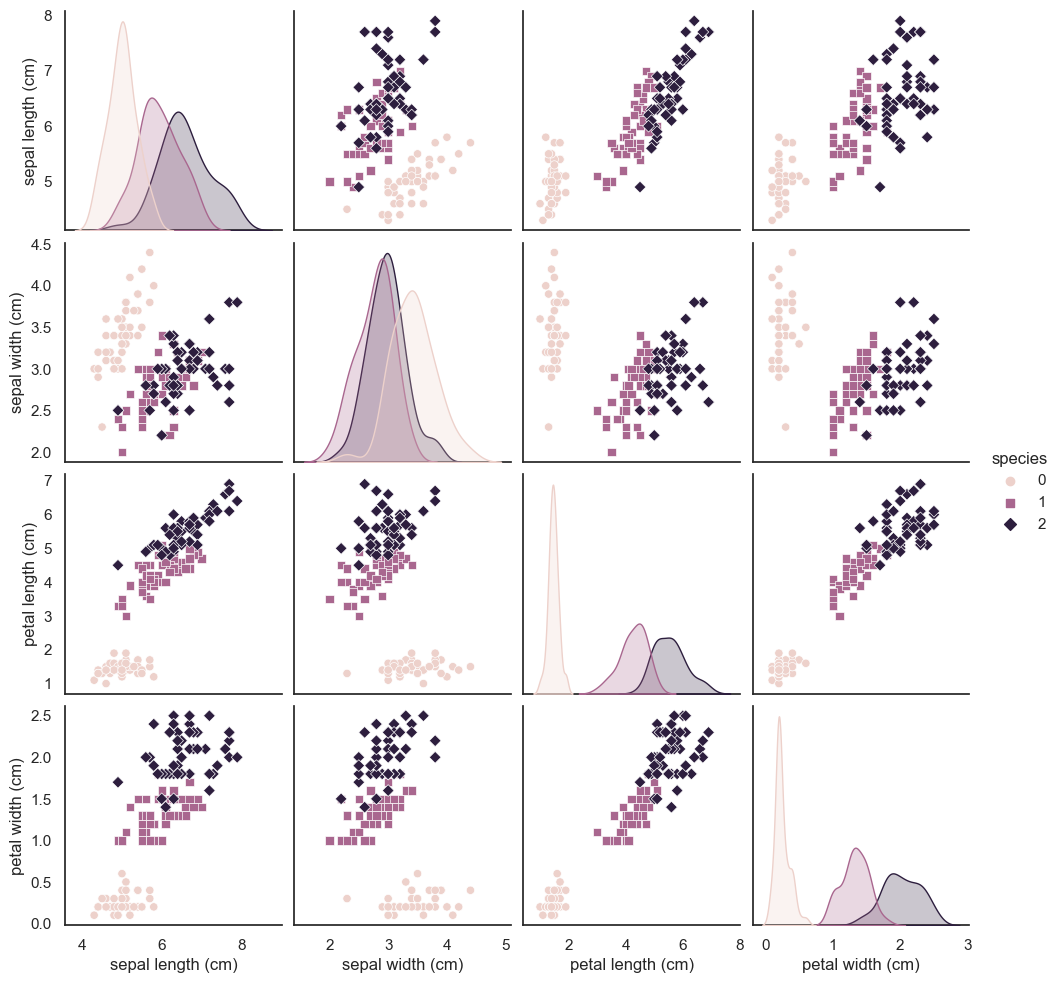

In [5]:
# Pair plot to visualize relationships between features
sns.pairplot(iris_df, hue="species", markers=["o", "s", "D"])
plt.show()

## Task 3: Data Transformation
### Question 3.1: Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Standardize the features (excluding the 'species' column)
X_scaled = scaler.fit_transform(iris_df.drop('species', axis=1))
# Convert the standardized data back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=iris.feature_names)
print(X_scaled_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


In [8]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
# Min-Max scaling the features (excluding the 'species' column)
X_minmax = min_max_scaler.fit_transform(iris_df.drop('species', axis=1))
X_minmax_df = pd.DataFrame(X_minmax, columns=iris.feature_names)

print(X_minmax_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667


### Question 3.2: Encoding the Target Variable

In [12]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'species' column
iris_df['species_encoded'] = label_encoder.fit_transform(iris_df['species'])

# Display the first 5 rows of the dataset with the encoded target variable
print(iris_df[['species', 'species_encoded']].head())

   species  species_encoded
0        0                0
1        0                0
2        0                0
3        0                0
4        0                0


In [10]:
print(iris_df['species'].dtype) # checkoing datatype for confirming the encoding is correct or not


int32


## Task 4: Dataset Splitting 
### Question 4.1 : Splitting the Dataset

In [11]:
from sklearn.model_selection import train_test_split

# Assuming iris_df contains the dataset with features and 'species' as the target variable
# Separate features (X) and target variable (y)
X = iris_df.drop('species', axis=1)  # Dropping 'species' column to get the features
y = iris_df['species']               # Keeping 'species' column as the target variable

# Perform an 80-20 split on the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the shape of the resulting training and testing sets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")


Training features shape: (120, 5)
Testing features shape: (30, 5)
Training target shape: (120,)
Testing target shape: (30,)


## Bonus Task:
### Question 5.1 : Principal Component Analysis (PCA)

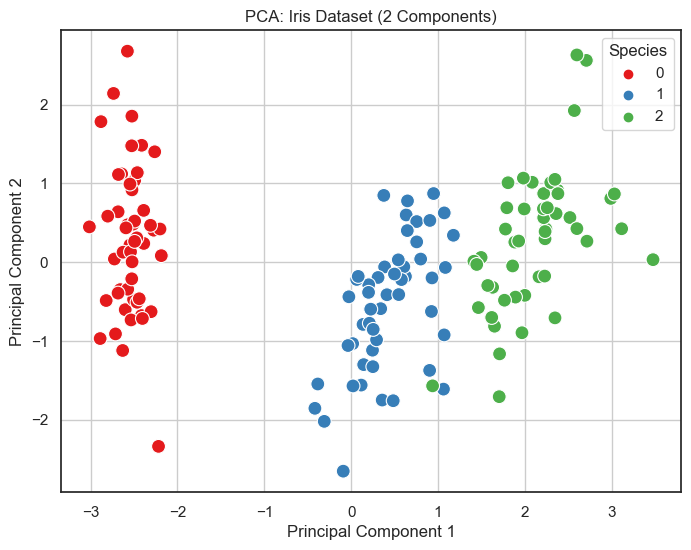

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize the feature data (X)

# Step 2: Perform PCA to reduce the dataset to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Create a DataFrame for easier plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = y

# Step 4: Plot the data points in the new 2D space, color-coded by species
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, palette='Set1', s=100)
plt.title('PCA: Iris Dataset (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species', loc='best')
plt.grid(True)
plt.show()